In [2]:
import os
import time
import gym
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# matmul = 행렬곱

import torch
import torch.optim
from torch import nn

In [3]:
def one_hot(x):

    # np.identity = 2차원 nxn 정방단위행렬 반환
    return np.identity(16)[x:x+1].astype(np.float32)

In [4]:
env = gym.make('FrozenLake-v0')

# Set Q-learning parameters
num_episodes = 2000
learning_rate = 0.1
dis = 0.99

# Input and output size based on the Env
input_size = env.observation_space.n
output_size = env.action_space.n

# weight
W = torch.rand([input_size, output_size], dtype=float)

# optimizer 
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

model = NeuralNetwork()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

print(W)

tensor([[0.9838, 0.9588, 0.0410, 0.8974],
        [0.8958, 0.3145, 0.0228, 0.1729],
        [0.1427, 0.6268, 0.5041, 0.3234],
        [0.0137, 0.5904, 0.6290, 0.1969],
        [0.2372, 0.1678, 0.9384, 0.4794],
        [0.3627, 0.0837, 0.6593, 0.6728],
        [0.3760, 0.4006, 0.8945, 0.9313],
        [0.9328, 0.2742, 0.0430, 0.7385],
        [0.6490, 0.3825, 0.9053, 0.3937],
        [0.7117, 0.3738, 0.6241, 0.8939],
        [0.7384, 0.9502, 0.9160, 0.7600],
        [0.3380, 0.7199, 0.9199, 0.9745],
        [0.5482, 0.2883, 0.3006, 0.4097],
        [0.7363, 0.3675, 0.9621, 0.4844],
        [0.0967, 0.4038, 0.1882, 0.7220],
        [0.8519, 0.3469, 0.6888, 0.5813]], dtype=torch.float64)


In [12]:
q_value = tf.matmul(one_hot(state), W)
print(q_value)
tortor = torch.Tensor(one_hot(state))

q_value = torch.matmul(tortor, W)
print(q_value)

tf.Tensor([[0.9838233  0.95876366 0.04103352 0.89739776]], shape=(1, 4), dtype=float32)


RuntimeError: ignored

In [6]:
start_time = time.time()
# rewards per episode
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False
    local_loss = []

    e = 1. / ((i / 50) + 10)
    # The Q-Table learning algorithm
    while not done:
        # Choose an action by greedly (with a chance of random action)
        # from the Q-network
        q_value = tf.matmul(one_hot(state), W)
        q_value = np.array(q_value.numpy())

        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_value)

        # Get new state and reward from environment
        state_next, reward, done, _ = env.step(action)
        if done:
            # Update Q, and no q_value+1, since it's action termial state
            q_value[0, action] = reward
        else:
            # Obtain the Q_s` values by feeding the new state through our network
            q_score_next = tf.matmul(one_hot(state_next), W)
            # Update Q
            q_value[0, action] = reward + dis * np.max(q_score_next)

        loss = lambda: tf.reduce_sum(input_tensor=tf.square(q_value - tf.matmul(one_hot(state), W)))
        # optimizer, loss가 작아지는 방향으로 W 업데이트
        optimizer.minimize(loss, var_list=W)
        rAll += reward
        state = state_next
    rList.append(rAll)

AttributeError: ignored

143.27579998970032 seconds
Success rate: 0.482


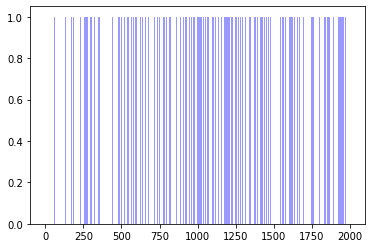

In [ ]:
print(f'{(time.time() - start_time)} seconds')
print("Success rate: " + str(sum(rList) / num_episodes))
plt.bar(range(len(rList)), rList, color='b', alpha=0.4)
plt.show()

In [ ]:
import torch

t1 = torch.tensor([[1, 2], [2, 3], [3, 4]], dtype = torch.int)

In [ ]:
print(t1)

tensor([[1, 2],
        [2, 3],
        [3, 4]], dtype=torch.int32)
